In [1]:
using Distributions
using PyPlot
using Statistics
using StatsBase

In [2]:
seps2 = 1
meps = 0
c = 1
phi = 0.5
n = 5000
X = ones(n)
eps = rand(Normal(meps, sqrt(seps2)), n)
for i in 2:n
    X[i] = c + phi*X[i-1] + eps[i]
end
# plot(X)

In [3]:
println("mean is ", mean(X))
println("theoretical mean is ", c/(1-phi))
println("variance is ", sum((X.-mean(X)).^2)/length(X))
println("theoretical variance is ", seps2/(1-phi^2))

mean is 2.0080549612021152
theoretical mean is 2.0
variance is 1.3340470458030194
theoretical variance is 1.3333333333333333


In [15]:
L = 30
ac = zeros(2*L+1) # autocovariance
for n in 1:2*L+1
    ac[n] = (seps2/(1-phi^2))*phi^abs(n-L-1)
end

theac = autocov(X);

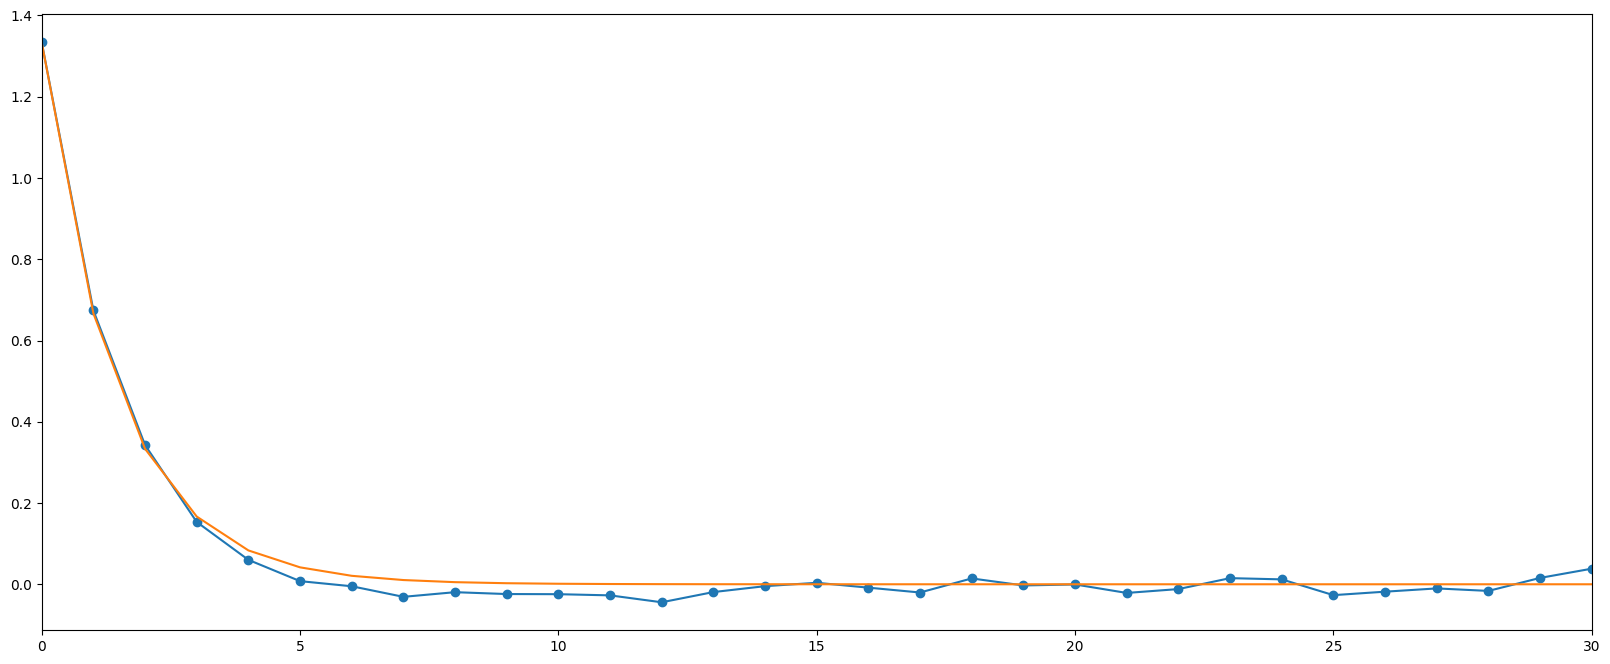

(0, 30)

In [14]:
figure(figsize = (20, 8))
plot(theac, marker = "o")
plot(-L:L, ac)
xlim((0, 30))